# Задание **Lite**

Для пользователя https://www.kinopoisk.ru/user/1127711/ 

Выгрузите все оценки к фильмам на первой странице и сохраните в pandas dataFrame

# Подключение библиотек

In [ ]:
import requests
from bs4 import BeautifulSoup             
import pandas as pd 

## Сделаем get запрос для текущей страницы

In [ ]:
user_id = 1127711

url = 'https://www.kinopoisk.ru/user/%d/votes/' % (user_id)
r = requests.get(url)
r.content

b'<!doctype html><html prefix="og: http://ogp.me/ns#"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1"><title data-react-helmet="true">\xd0\x9e\xd0\xb9!</title><meta data-react-helmet="true" property="og:title" content="\xd0\xaf\xd0\xbd\xd0\xb4\xd0\xb5\xd0\xba\xd1\x81"><meta data-react-helmet="true" property="og:description" content="\xd0\x9d\xd0\xb0\xd0\xb9\xd0\xb4\xd1\x91\xd1\x82\xd1\x81\xd1\x8f \xd0\xb2\xd1\x81\xd1\x91"><meta data-react-helmet="true" property="og:image" content="https://yastatic.net/s3/home-static/_/37/37a02b5dc7a51abac55d8a5b6c865f0e.png"><link rel="stylesheet" href="/captcha_smart.5205103d27eb76a58bbb.min.css?k=1657871267302"><style>@media only screen and (min-width:651px){body{background-image:url(\'https://captcha-backgrounds.s3.yandex.net/static/kinopoisk-background.jpg\')}}.LogoLink{background-image:url(\'\')}</style><div id="root"><div class="Theme Theme_color_yandex-

In [ ]:
# Для обхода Капчи добавим Header из браузера
header = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
'accept-encoding': 'gzip, deflate, br',
'accept-language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
'cache-control': 'max-age=0',
'referer': 'https://www.kinopoisk.ru/user/1127711/',
'sec-fetch-dest': 'document',
'sec-fetch-mode': 'navigate',
'sec-fetch-site': 'same-origin',
'sec-fetch-user': '?1',
'upgrade-insecure-requests': '1',
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
}

Еще раз, но уже с обходом капчи

In [ ]:
user_id = 1127711
url = 'https://www.kinopoisk.ru/user/%d/votes/' % (user_id) # Для первой страницы
r = requests.get(url,headers=header)
r.content

b'\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" dir="ltr" lang="ru" prefix="og: http://ogp.me/ns# video: http://ogp.me/ns/video# ya: http://webmaster.yandex.ru/vocabularies/">\n<head profile="http://gmpg.org/xfn/11">\n    <title>\xd0\x9f\xd1\x80\xd0\xbe\xd1\x84\xd0\xb8\xd0\xbb\xd1\x8c: maksimkat1 - \xd0\x9e\xd1\x86\xd0\xb5\xd0\xbd\xd0\xba\xd0\xb8</title>\n\n    <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n    <meta property="fb:app_id" content="121953784483000"/>\n    <meta name="application-name" content="\xd0\x9a\xd0\xb8\xd0\xbd\xd0\xbe\xd0\xbf\xd0\xbe\xd0\xb8\xd1\x81\xd0\xba">\n    <meta content="width=960" name="viewport" />\n    <meta property="fb:pages" content="152308956519" />\n\n    <link rel="search" type="applicat

Сохраняем в HTML

In [ ]:
with open('test.html', 'w') as output_file:
  output_file.write(str(r.text.encode('utf-8')))

Посмотрим что внутри **test.html**

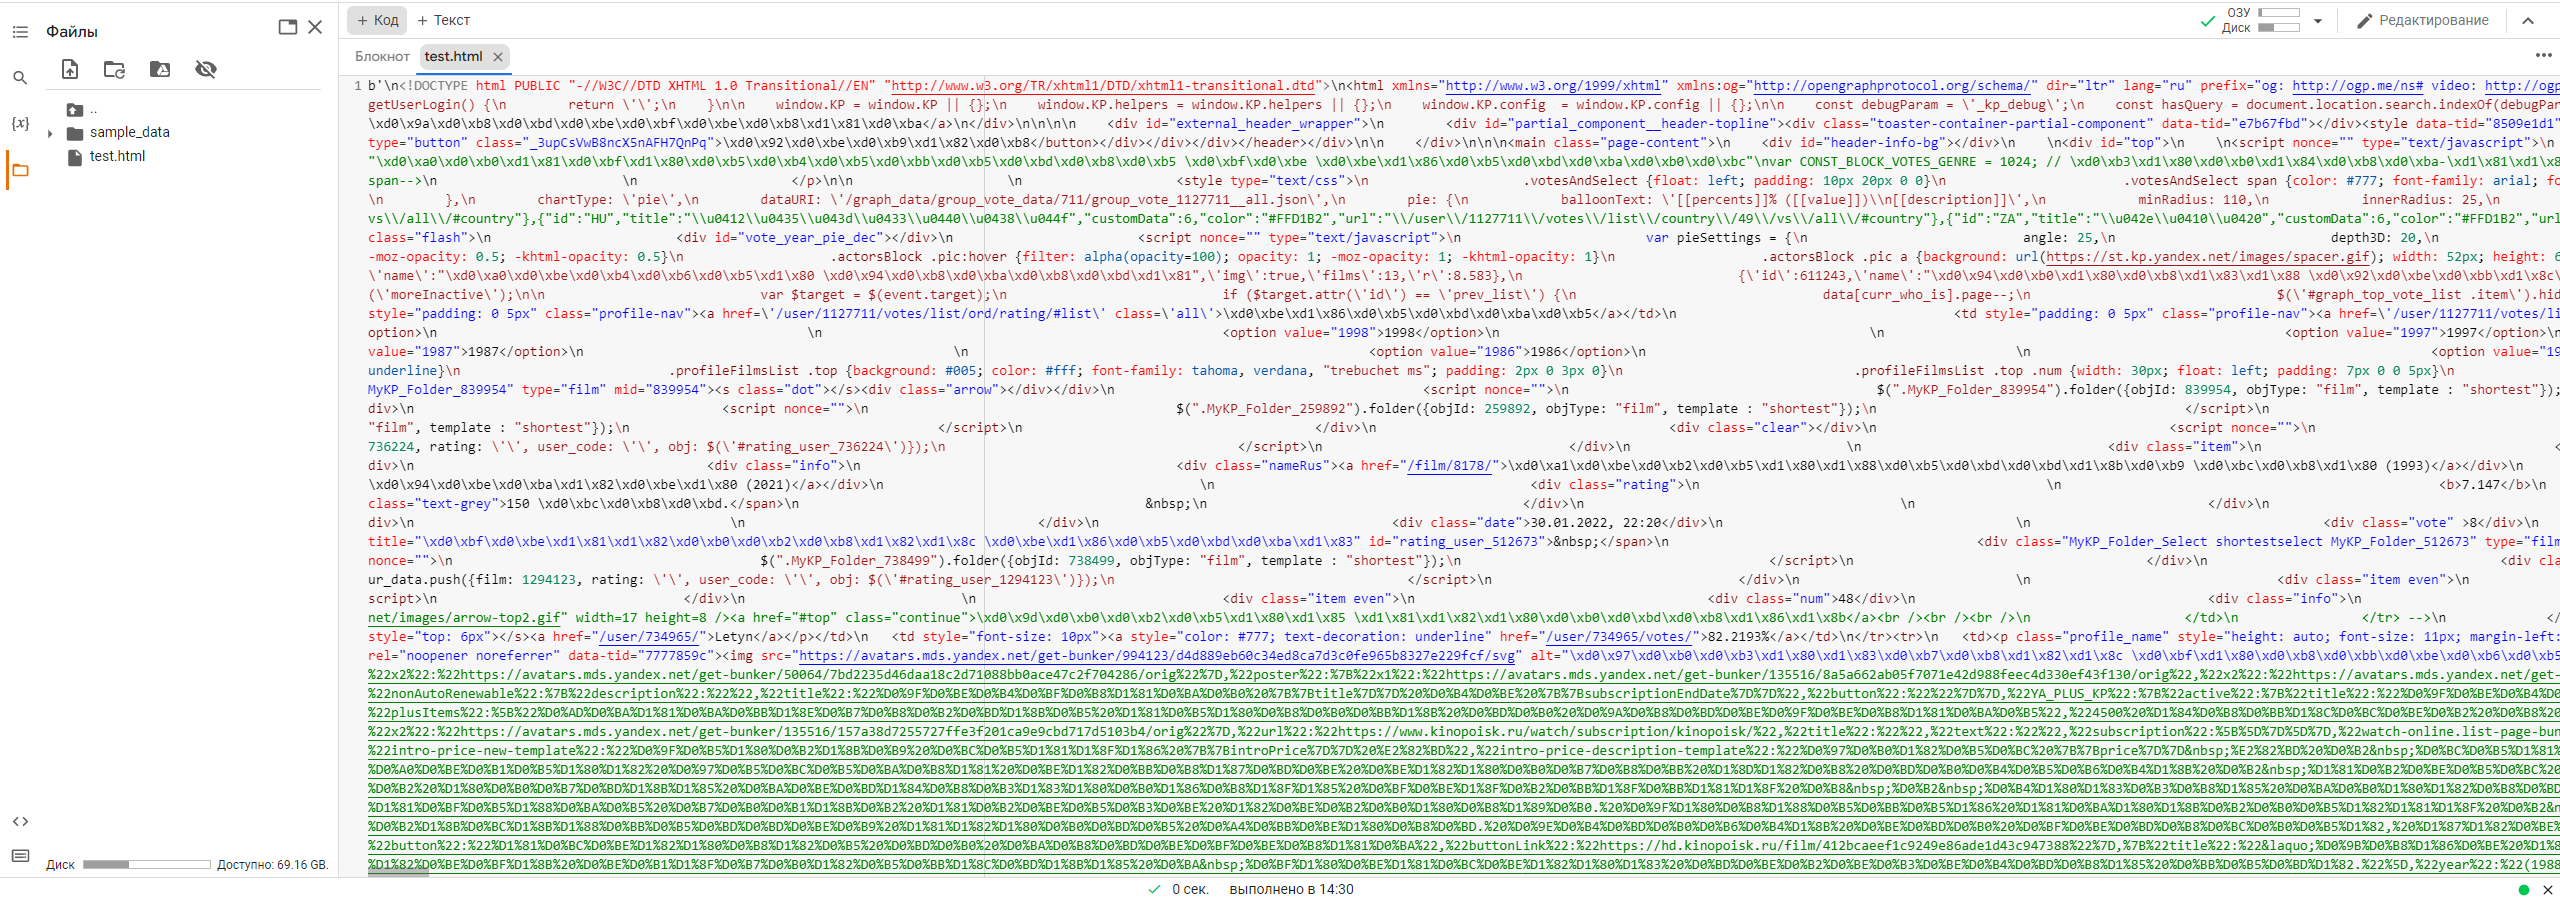

## Используем бибилиотеку BeautifulSoup

In [ ]:
soup = BeautifulSoup(r.text)

In [ ]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html dir="ltr" lang="ru" prefix="og: http://ogp.me/ns# video: http://ogp.me/ns/video# ya: http://webmaster.yandex.ru/vocabularies/" xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/">
<head profile="http://gmpg.org/xfn/11">
<title>Профиль: maksimkat1 - Оценки</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="121953784483000" property="fb:app_id"/>
<meta content="Кинопоиск" name="application-name"/>
<meta content="width=960" name="viewport"/>
<meta content="152308956519" property="fb:pages"/>
<link href="/kp_search.xml" rel="search" title="Поиск на kinopoisk.ru" type="application/opensearchdescription+xml"/>
<meta content="#000" name="msapplication-TileColor"/>
<meta content="https://yastatic.net/s3/kinopoisk-frontend/common-sta

In [ ]:
# Далее нужно найти все теги div 
# Класс которых называется profileFilmsList -   'class': 'profileFilmsList'

film_list = soup.find('div', {'class': 'profileFilmsList'})
print(film_list)

<div class="profileFilmsList">
<div class="top">
<div class="num">№</div>
<div class="name">фильм</div>
<div class="date">дата и время</div>
<div class="ya-sync"></div>
<div class="vote">оценка maksimkat1</div>
<div class="vote myvote">моя<br/>оценка</div>
<div class="clear"></div>
</div>
<div class="item">
<div class="num">1</div>
<div class="info">
<div class="nameRus"><a href="/film/909898/">Под покровом ночи (2016)</a></div>
<div class="nameEng">Nocturnal Animals</div>
<div class="rating">
<b>7.305</b>
<span class="text-grey">(126 213)</span>
<span class="text-grey">116 мин.</span>
                                              
                                         </div>
</div>
<div class="date">22.07.2022, 00:16</div>
<div class="vote">9</div>
<div class="selects vote_widget">
<span id="rating_user_909898" title="поставить оценку"> </span>
<div class="MyKP_Folder_Select shortestselect MyKP_Folder_909898" mid="909898" type="film"><s class="dot"></s><div class="arrow"></div></di

Далее преобразуем в список с помощью find_all забираем список строк с классом item и item even. Чтобы потом пройтись по этому списку циклом

In [ ]:
items = film_list.find_all('div', {'class': ['item', 'item even']})

In [ ]:
print(items)

[<div class="item">
<div class="num">1</div>
<div class="info">
<div class="nameRus"><a href="/film/909898/">Под покровом ночи (2016)</a></div>
<div class="nameEng">Nocturnal Animals</div>
<div class="rating">
<b>7.305</b>
<span class="text-grey">(126 213)</span>
<span class="text-grey">116 мин.</span>
                                              
                                         </div>
</div>
<div class="date">22.07.2022, 00:16</div>
<div class="vote">9</div>
<div class="selects vote_widget">
<span id="rating_user_909898" title="поставить оценку"> </span>
<div class="MyKP_Folder_Select shortestselect MyKP_Folder_909898" mid="909898" type="film"><s class="dot"></s><div class="arrow"></div></div>
<script nonce="">
                                        $(".MyKP_Folder_909898").folder({objId: 909898, objType: "film", template : "shortest"});
                                        </script>
</div>
<div class="clear"></div>
<script nonce="">
                                     

**Посмотрим на результат**

In [ ]:
# Создаем таблицу Пандас с названиями колонок
df = pd.DataFrame(columns = ['Название','Рейтинг фильма','Оценки пользователя 1127711'])

In [ ]:
n = 1   # Счетчик строк в таблице

for i in items:
  nameRus=i.find('div',{'class': 'nameRus'}).find('a').text
  rating=i.find('div',{'class':'rating'}).find('b').text
  vote=i.find('div',{'class':'vote'}).text
  df.loc[n]=[nameRus,rating,vote]
  n += 1


In [ ]:
df

,Название,Рейтинг фильма,Оценки пользователя 1127711
1,Под покровом ночи (2016),7.305,9
2,Легенда (2015),7.170,
3,"Паразит: Учение о жизни (сериал, 2014 – 2015)",8.139,10
4,Всё везде и сразу (2021),7.429,10
5,Американский психопат (2000),7.140,
6,Паприка (2006),7.636,
7,"Любовь. Смерть. Роботы (сериал, 2019 – 2022)",8.248,10
8,"День, когда Земля остановилась (2008)",6.266,5
9,Побег из Вегаса (2010),6.567,4
10,Звук острова Блок (2020),5.370,5
